# Set up environment

Don't run the following Cell if you are using local machine

In [ ]:
!git clone https://{GITHUB_ACCESS_TOKEN}@github.com/AliMohseninejad/ganbert-classifier.git
!rm ganbert-classifier/Codes/main.ipynb
!cp -r ganbert-classifier/Codes/data/ ./
!cp -r ganbert-classifier/Codes/evaluation/ ./
!cp -r ganbert-classifier/Codes/model/ ./
!cp -r ganbert-classifier/Codes/training/ ./
!cp -r ganbert-classifier/Dataset/ ../
!cp -r ganbert-classifier/Plots/ ./

In [ ]:
!pip install -qU transformers

Run the following cell only if you are using google colab.
The dataset should be available on your google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = "drive/MyDrive/"
multi_gpu=False

Run the following cell only if you are using Kaggle. The dataset should be first uploaded to Kaggle as the "subtaskB" dataset.

In [ ]:
dataset_path = "/kaggle/input/subtaskb/"
multi_gpu=False

Run the following cell only if you are using local machine. The dataset should be in the "Dataset" folder.

In [1]:
dataset_path = "../Dataset/"
multi_gpu=False

In [ ]:
import torch
import numpy as np
import os

from data.data_loader import generate_dataloader
from model.bert import get_bert_model, get_tokenizer, get_bert_model_with_adapter
from model.discriminator import Discriminator
from model.generator1 import Generator1
from training.train import train_vanilla_classier, train_gan
from evaluation.test import test_vanilla_bert, test_gan_bert
from training.visualize import plot_results, plot_results_gan

/home/ali/Courses/deep_learning/hw/deep_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Vanilla BERT

In [3]:
torch.manual_seed(42)
train_batch_size = 128
val_test_batch_size = 128
epochs = 10
learning_rate = 5e-5
max_size = 64
model_name = "bert-base-cased"
bert_tokenizer, bert_config = get_tokenizer(model_name=model_name)

In [ ]:
if not os.path.exists("./Plots/vanilla-bert/"):
    os.mkdir(path="./Plots/vanilla-bert/")

100%|██████████| 5/5 [00:09<00:00,  1.83s/it]



----------------------------------------------
Epoch 1/10: Train Loss: 1.8304, Train Accuracy: 0.1784, Train F1: 0.1733 Validation Loss: 1.7925, Validation Accuracy: 0.1712, Validation F1: 0.0740
-----------------------------------------------



100%|██████████| 5/5 [00:09<00:00,  1.87s/it]



----------------------------------------------
Epoch 2/10: Train Loss: 1.8389, Train Accuracy: 0.1534, Train F1: 0.1540 Validation Loss: 1.7895, Validation Accuracy: 0.1740, Validation F1: 0.1185
-----------------------------------------------



100%|██████████| 5/5 [00:09<00:00,  1.93s/it]



----------------------------------------------
Epoch 3/10: Train Loss: 1.7996, Train Accuracy: 0.1909, Train F1: 0.1893 Validation Loss: 1.7854, Validation Accuracy: 0.1823, Validation F1: 0.1083
-----------------------------------------------



100%|██████████| 5/5 [00:09<00:00,  1.88s/it]



----------------------------------------------
Epoch 4/10: Train Loss: 1.7962, Train Accuracy: 0.1972, Train F1: 0.1956 Validation Loss: 1.7783, Validation Accuracy: 0.2255, Validation F1: 0.1885
-----------------------------------------------



100%|██████████| 5/5 [00:09<00:00,  1.86s/it]



----------------------------------------------
Epoch 5/10: Train Loss: 1.7665, Train Accuracy: 0.2207, Train F1: 0.2168 Validation Loss: 1.7642, Validation Accuracy: 0.2412, Validation F1: 0.1845
-----------------------------------------------



100%|██████████| 5/5 [00:09<00:00,  1.90s/it]



----------------------------------------------
Epoch 6/10: Train Loss: 1.7169, Train Accuracy: 0.2692, Train F1: 0.2518 Validation Loss: 1.7447, Validation Accuracy: 0.2537, Validation F1: 0.2084
-----------------------------------------------



100%|██████████| 5/5 [00:09<00:00,  1.87s/it]



----------------------------------------------
Epoch 7/10: Train Loss: 1.6237, Train Accuracy: 0.3521, Train F1: 0.3225 Validation Loss: 1.7254, Validation Accuracy: 0.2614, Validation F1: 0.2167
-----------------------------------------------



100%|██████████| 5/5 [00:09<00:00,  1.86s/it]



----------------------------------------------
Epoch 8/10: Train Loss: 1.5119, Train Accuracy: 0.4241, Train F1: 0.3922 Validation Loss: 1.6659, Validation Accuracy: 0.3221, Validation F1: 0.2959
-----------------------------------------------



100%|██████████| 5/5 [00:09<00:00,  1.88s/it]



----------------------------------------------
Epoch 9/10: Train Loss: 1.3390, Train Accuracy: 0.4914, Train F1: 0.4439 Validation Loss: 1.6640, Validation Accuracy: 0.3356, Validation F1: 0.3137
-----------------------------------------------



100%|██████████| 5/5 [00:08<00:00,  1.79s/it]



----------------------------------------------
Epoch 10/10: Train Loss: 1.1675, Train Accuracy: 0.6244, Train F1: 0.5975 Validation Loss: 1.6810, Validation Accuracy: 0.3453, Validation F1: 0.3276
-----------------------------------------------

Best model saved at epoch 9
Test Accuracy equals: 0.198
Test f1 score equals: 0.14612708617623052


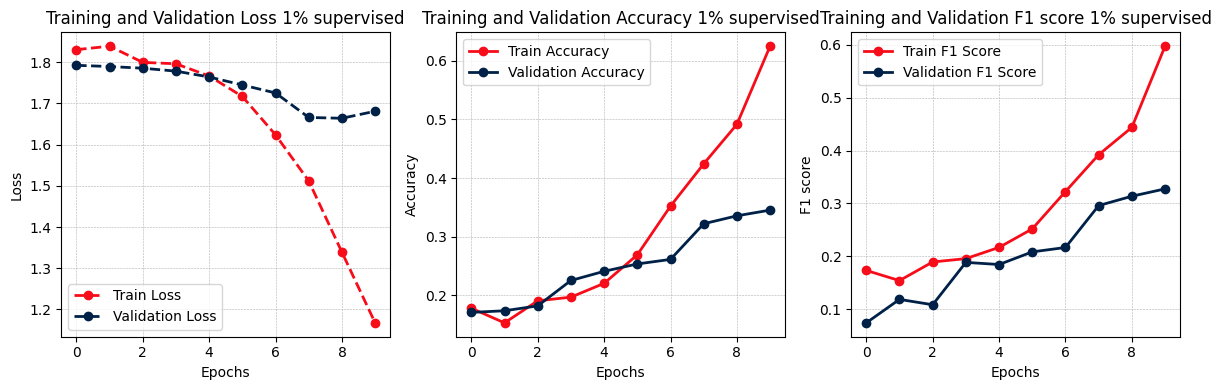

100%|██████████| 25/25 [00:46<00:00,  1.85s/it]



----------------------------------------------
Epoch 1/10: Train Loss: 1.7827, Train Accuracy: 0.2046, Train F1: 0.1997 Validation Loss: 1.6596, Validation Accuracy: 0.3201, Validation F1: 0.2565
-----------------------------------------------



100%|██████████| 25/25 [00:46<00:00,  1.87s/it]



----------------------------------------------
Epoch 2/10: Train Loss: 1.5830, Train Accuracy: 0.3454, Train F1: 0.3152 Validation Loss: 1.4624, Validation Accuracy: 0.3969, Validation F1: 0.3765
-----------------------------------------------



100%|██████████| 25/25 [00:46<00:00,  1.85s/it]



----------------------------------------------
Epoch 3/10: Train Loss: 1.2659, Train Accuracy: 0.4790, Train F1: 0.4649 Validation Loss: 1.5026, Validation Accuracy: 0.4390, Validation F1: 0.4248
-----------------------------------------------



100%|██████████| 25/25 [00:45<00:00,  1.83s/it]



----------------------------------------------
Epoch 4/10: Train Loss: 0.9308, Train Accuracy: 0.6508, Train F1: 0.6494 Validation Loss: 1.3104, Validation Accuracy: 0.5316, Validation F1: 0.5220
-----------------------------------------------



100%|██████████| 25/25 [00:45<00:00,  1.81s/it]



----------------------------------------------
Epoch 5/10: Train Loss: 0.5906, Train Accuracy: 0.7960, Train F1: 0.7947 Validation Loss: 1.3547, Validation Accuracy: 0.5622, Validation F1: 0.5598
-----------------------------------------------



100%|██████████| 25/25 [00:46<00:00,  1.84s/it]



----------------------------------------------
Epoch 6/10: Train Loss: 0.3837, Train Accuracy: 0.8745, Train F1: 0.8741 Validation Loss: 1.4201, Validation Accuracy: 0.5834, Validation F1: 0.5774
-----------------------------------------------



100%|██████████| 25/25 [00:45<00:00,  1.83s/it]



----------------------------------------------
Epoch 7/10: Train Loss: 0.2354, Train Accuracy: 0.9255, Train F1: 0.9253 Validation Loss: 1.5115, Validation Accuracy: 0.5951, Validation F1: 0.5867
-----------------------------------------------



100%|██████████| 25/25 [00:45<00:00,  1.82s/it]



----------------------------------------------
Epoch 8/10: Train Loss: 0.1282, Train Accuracy: 0.9665, Train F1: 0.9665 Validation Loss: 1.7370, Validation Accuracy: 0.5834, Validation F1: 0.5796
-----------------------------------------------



100%|██████████| 25/25 [00:45<00:00,  1.82s/it]



----------------------------------------------
Epoch 9/10: Train Loss: 0.0666, Train Accuracy: 0.9878, Train F1: 0.9878 Validation Loss: 1.7413, Validation Accuracy: 0.6006, Validation F1: 0.5860
-----------------------------------------------



100%|██████████| 25/25 [00:45<00:00,  1.82s/it]



----------------------------------------------
Epoch 10/10: Train Loss: 0.0633, Train Accuracy: 0.9850, Train F1: 0.9850 Validation Loss: 1.8681, Validation Accuracy: 0.5976, Validation F1: 0.5886
-----------------------------------------------

Best model saved at epoch 8
Test Accuracy equals: 0.4533333333333333
Test f1 score equals: 0.3959524035362709


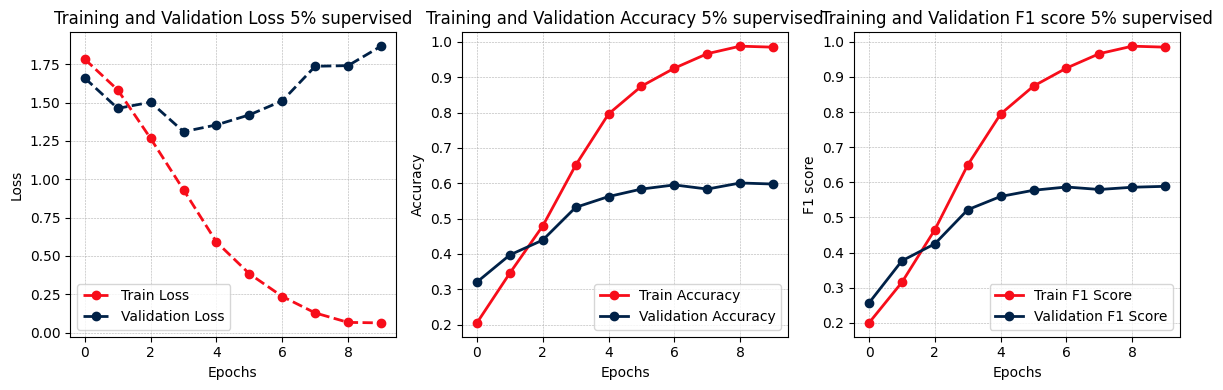

100%|██████████| 50/50 [01:33<00:00,  1.86s/it]



----------------------------------------------
Epoch 1/10: Train Loss: 1.6886, Train Accuracy: 0.2741, Train F1: 0.2655 Validation Loss: 1.3734, Validation Accuracy: 0.4301, Validation F1: 0.3414
-----------------------------------------------



100%|██████████| 50/50 [01:33<00:00,  1.86s/it]



----------------------------------------------
Epoch 2/10: Train Loss: 1.1564, Train Accuracy: 0.5277, Train F1: 0.5094 Validation Loss: 1.0570, Validation Accuracy: 0.5875, Validation F1: 0.5799
-----------------------------------------------



100%|██████████| 50/50 [01:33<00:00,  1.86s/it]



----------------------------------------------
Epoch 3/10: Train Loss: 0.7936, Train Accuracy: 0.7028, Train F1: 0.6981 Validation Loss: 1.2198, Validation Accuracy: 0.5700, Validation F1: 0.5687
-----------------------------------------------



100%|██████████| 50/50 [01:31<00:00,  1.83s/it]



----------------------------------------------
Epoch 4/10: Train Loss: 0.5161, Train Accuracy: 0.8137, Train F1: 0.8129 Validation Loss: 1.1597, Validation Accuracy: 0.6257, Validation F1: 0.6200
-----------------------------------------------



100%|██████████| 50/50 [01:30<00:00,  1.81s/it]



----------------------------------------------
Epoch 5/10: Train Loss: 0.3792, Train Accuracy: 0.8669, Train F1: 0.8660 Validation Loss: 1.1025, Validation Accuracy: 0.6683, Validation F1: 0.6693
-----------------------------------------------



100%|██████████| 50/50 [01:30<00:00,  1.82s/it]



----------------------------------------------
Epoch 6/10: Train Loss: 0.2107, Train Accuracy: 0.9335, Train F1: 0.9333 Validation Loss: 1.5301, Validation Accuracy: 0.6189, Validation F1: 0.6146
-----------------------------------------------



100%|██████████| 50/50 [01:30<00:00,  1.81s/it]



----------------------------------------------
Epoch 7/10: Train Loss: 0.1340, Train Accuracy: 0.9584, Train F1: 0.9583 Validation Loss: 1.5814, Validation Accuracy: 0.6407, Validation F1: 0.6378
-----------------------------------------------



100%|██████████| 50/50 [01:30<00:00,  1.81s/it]



----------------------------------------------
Epoch 8/10: Train Loss: 0.1221, Train Accuracy: 0.9596, Train F1: 0.9596 Validation Loss: 1.9208, Validation Accuracy: 0.5940, Validation F1: 0.5869
-----------------------------------------------



100%|██████████| 50/50 [01:29<00:00,  1.79s/it]



----------------------------------------------
Epoch 9/10: Train Loss: 0.0752, Train Accuracy: 0.9783, Train F1: 0.9782 Validation Loss: 1.6725, Validation Accuracy: 0.6442, Validation F1: 0.6457
-----------------------------------------------



100%|██████████| 50/50 [01:29<00:00,  1.80s/it]



----------------------------------------------
Epoch 10/10: Train Loss: 0.0532, Train Accuracy: 0.9848, Train F1: 0.9848 Validation Loss: 1.8996, Validation Accuracy: 0.6386, Validation F1: 0.6310
-----------------------------------------------

Best model saved at epoch 4
Test Accuracy equals: 0.4653333333333333
Test f1 score equals: 0.4006773985227407


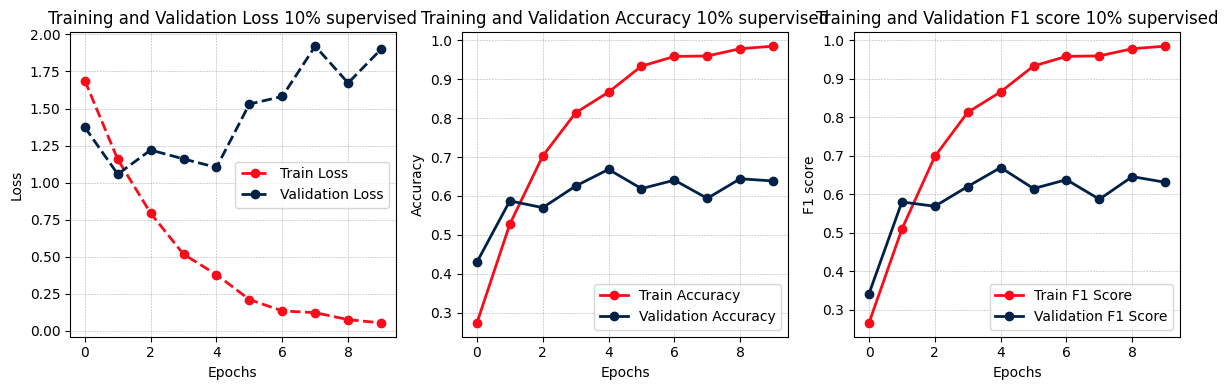

100%|██████████| 250/250 [07:47<00:00,  1.87s/it]



----------------------------------------------
Epoch 1/10: Train Loss: 1.1743, Train Accuracy: 0.5161, Train F1: 0.5128 Validation Loss: 0.8092, Validation Accuracy: 0.6922, Validation F1: 0.6933
-----------------------------------------------



100%|██████████| 250/250 [07:33<00:00,  1.82s/it]



----------------------------------------------
Epoch 2/10: Train Loss: 0.6406, Train Accuracy: 0.7595, Train F1: 0.7597 Validation Loss: 0.7372, Validation Accuracy: 0.7228, Validation F1: 0.7200
-----------------------------------------------



100%|██████████| 250/250 [07:31<00:00,  1.81s/it]



----------------------------------------------
Epoch 3/10: Train Loss: 0.4180, Train Accuracy: 0.8473, Train F1: 0.8474 Validation Loss: 0.7989, Validation Accuracy: 0.7307, Validation F1: 0.7286
-----------------------------------------------



100%|██████████| 250/250 [07:35<00:00,  1.82s/it]



----------------------------------------------
Epoch 4/10: Train Loss: 0.2596, Train Accuracy: 0.9089, Train F1: 0.9089 Validation Loss: 0.8780, Validation Accuracy: 0.7352, Validation F1: 0.7357
-----------------------------------------------



100%|██████████| 250/250 [07:34<00:00,  1.82s/it]



----------------------------------------------
Epoch 5/10: Train Loss: 0.1545, Train Accuracy: 0.9465, Train F1: 0.9465 Validation Loss: 1.4186, Validation Accuracy: 0.6845, Validation F1: 0.6760
-----------------------------------------------



100%|██████████| 250/250 [07:33<00:00,  1.81s/it]



----------------------------------------------
Epoch 6/10: Train Loss: 0.1068, Train Accuracy: 0.9652, Train F1: 0.9652 Validation Loss: 1.1445, Validation Accuracy: 0.7301, Validation F1: 0.7301
-----------------------------------------------



100%|██████████| 250/250 [07:31<00:00,  1.81s/it]



----------------------------------------------
Epoch 7/10: Train Loss: 0.0757, Train Accuracy: 0.9741, Train F1: 0.9741 Validation Loss: 1.2907, Validation Accuracy: 0.7290, Validation F1: 0.7242
-----------------------------------------------



100%|██████████| 250/250 [07:34<00:00,  1.82s/it]



----------------------------------------------
Epoch 8/10: Train Loss: 0.0569, Train Accuracy: 0.9808, Train F1: 0.9808 Validation Loss: 1.2269, Validation Accuracy: 0.7515, Validation F1: 0.7506
-----------------------------------------------



100%|██████████| 250/250 [07:30<00:00,  1.80s/it]



----------------------------------------------
Epoch 9/10: Train Loss: 0.0534, Train Accuracy: 0.9828, Train F1: 0.9828 Validation Loss: 1.2755, Validation Accuracy: 0.7367, Validation F1: 0.7336
-----------------------------------------------



100%|██████████| 250/250 [07:30<00:00,  1.80s/it]



----------------------------------------------
Epoch 10/10: Train Loss: 0.0515, Train Accuracy: 0.9825, Train F1: 0.9825 Validation Loss: 1.2428, Validation Accuracy: 0.7428, Validation F1: 0.7434
-----------------------------------------------

Best model saved at epoch 7
Test Accuracy equals: 0.488
Test f1 score equals: 0.47544143148459383


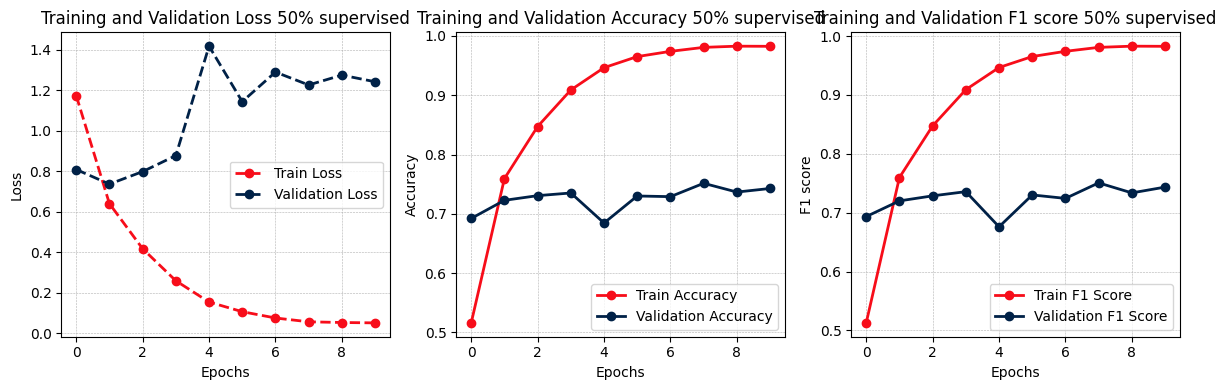

In [ ]:
bert_acc_list = []
bert_f1_list = []
for supervised_ratio in [0.01, 0.05, 0.10, 0.50]:
    bert_save_path = f"./Plots/vanilla-bert/bert_{int(100*(supervised_ratio))}sup.pth"
    discriminator_save_path = (
        f"./Plots/vanilla-bert/discriminator_{int(100*(supervised_ratio))}sup.pth"
    )
    plot_save_path = f"./Plots/vanilla-bert/"

    bert_model, _ = get_bert_model(model_name=model_name)
    classifier = Discriminator(num_labels=6)

    # Get dataloaders
    train_dataloader, val_dataloader, test_dataloader = generate_dataloader(
        dataset_folder_path=dataset_path,
        unsupervised_ratio=1-supervised_ratio,
        tokenizer=bert_tokenizer,
        train_batch_size=train_batch_size,
        valid_batch_size=val_test_batch_size,
        test_batch_size=val_test_batch_size,
        use_unsup=False,
        max_length=max_size,
        use_bow_dataset=False,
        random_seed=42,
    )

    # Define optimizer
    model_params = [v for v in bert_model.parameters()] + [
        v for v in classifier.parameters()
    ]
    optimizer = torch.optim.AdamW(model_params, lr=learning_rate)

    # Train the model
    bert_model, classifier, vanilla_training_results = train_vanilla_classier(
        transformer=bert_model,
        classifier=classifier,
        optimizer=optimizer,
        epochs=epochs,
        scheduler=None,
        train_dataloader=train_dataloader,
        validation_dataloader=val_dataloader,
        transformer_path=bert_save_path,
        classifier_path=discriminator_save_path,
        multi_gpu=multi_gpu
    )


    # Test the model
    test_acc, test_f1 = test_vanilla_bert(
        bert_model_name=model_name,
        transformer_path=bert_save_path,
        discriminator_path=discriminator_save_path,
        test_dataloader=test_dataloader
    )
    bert_acc_list.append(test_acc)
    bert_f1_list.append(test_f1)
    title_suffix = " " + str(int(100*(supervised_ratio))) + f"% supervised"
    # Visualize results
    plot_results(vanilla_training_results, title_suffix, plot_save_path)

np.save(file="./Plots/vanilla-bert/acc.npy", arr=np.array(bert_acc_list))
np.save(file="./Plots/vanilla-bert/f1.npy", arr=np.array(bert_f1_list))

# Bert + Adapter

In [ ]:
torch.manual_seed(42)
train_batch_size = 128
val_test_batch_size = 128
epochs = 10
learning_rate = 5e-5
max_size = 64
model_name = "bert-base-cased"
bert_tokenizer, bert_config = get_tokenizer(model_name=model_name)

In [ ]:
if not os.path.exists("./Plots/adapter-bert/"):
    os.mkdir(path="./Plots/adapter-bert/")

In [ ]:
adapter_bert_acc_list = []
adapter_bert_f1_list = []
for supervised_ratio in [0.01, 0.05, 0.10, 0.50]:
    bert_save_path = f"./Plots/adapter-bert/bert_{int(100*(supervised_ratio))}sup.pth"
    discriminator_save_path = (
        f"./Plots/adapter-bert/discriminator_{int(100*(supervised_ratio))}sup.pth"
    )
    plot_save_path = f"./Plots/adapter-bert/"

    bert_model, _ = get_bert_model_with_adapter(model_name=model_name)
    classifier = Discriminator(num_labels=6)

    # Get dataloaders
    train_dataloader, val_dataloader, test_dataloader = generate_dataloader(
        dataset_folder_path=dataset_path,
        unsupervised_ratio=1-supervised_ratio,
        tokenizer=bert_tokenizer,
        train_batch_size=train_batch_size,
        valid_batch_size=val_test_batch_size,
        test_batch_size=val_test_batch_size,
        use_unsup=False,
        max_length=max_size,
        use_bow_dataset=False,
        random_seed=42,
    )

    # Define optimizer
    model_params = [v for v in bert_model.parameters()] + [
        v for v in classifier.parameters()
    ]
    optimizer = torch.optim.AdamW(model_params, lr=learning_rate)

    # Train the model
    bert_model, classifier, vanilla_training_results = train_vanilla_classier(
        transformer=bert_model,
        classifier=classifier,
        optimizer=optimizer,
        epochs=epochs,
        scheduler=None,
        train_dataloader=train_dataloader,
        validation_dataloader=val_dataloader,
        transformer_path=bert_save_path,
        classifier_path=discriminator_save_path,
        multi_gpu=multi_gpu
    )

    
    # Test the model
    test_acc, test_f1 = test_vanilla_bert(
        bert_model_name=model_name,
        transformer_path=bert_save_path,
        discriminator_path=discriminator_save_path,
        test_dataloader=test_dataloader
    )

    adapter_bert_acc_list.append(test_acc)
    adapter_bert_f1_list.append(test_f1)
    title_suffix = " " + str(int(100*(supervised_ratio))) + f"% supervised" 
    # Visualize results
    plot_results(vanilla_training_results, title_suffix, plot_save_path)

np.save(file="./Plots/adapter-bert/acc.npy", arr=np.array(adapter_bert_acc_list))
np.save(file="./Plots/adapter-bert/f1.npy", arr=np.array(adapter_bert_f1_list))

# GAN-BERT

## G1

In [ ]:
torch.manual_seed(42)
train_batch_size = 256
val_test_batch_size = 256
epochs = 5
learning_rate_discriminator = 5e-5
learning_rate_generator = 5e-5
max_size = 64
model_name = "bert-base-cased"
bert_tokenizer, bert_config = get_tokenizer(model_name=model_name)

In [ ]:
if not os.path.exists("./Plots/generator1/"):
    os.mkdir(path="./Plots/generator1/")

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

100%|██████████| 263/263 [13:18<00:00,  3.03s/it]


Epoch 1/5: Train Loss G: 0.1626, Train Loss D: 19.8635, Validation Loss: 0.7718, Validation Accuracy: 0.7058, Validation_f1: 0.6987


100%|██████████| 263/263 [13:32<00:00,  3.09s/it]


Epoch 2/5: Train Loss G: 0.1752, Train Loss D: 10.5836, Validation Loss: 0.6712, Validation Accuracy: 0.7515, Validation_f1: 0.7480


100%|██████████| 263/263 [13:33<00:00,  3.09s/it]


Epoch 3/5: Train Loss G: 0.1733, Train Loss D: 6.9314, Validation Loss: 0.6971, Validation Accuracy: 0.7677, Validation_f1: 0.7627


100%|██████████| 263/263 [13:34<00:00,  3.10s/it]


Epoch 4/5: Train Loss G: 0.1682, Train Loss D: 4.9671, Validation Loss: 0.7700, Validation Accuracy: 0.7639, Validation_f1: 0.7625


100%|██████████| 263/263 [13:33<00:00,  3.09s/it]


Epoch 5/5: Train Loss G: 0.1635, Train Loss D: 3.1988, Validation Loss: 0.8702, Validation Accuracy: 0.7612, Validation_f1: 0.7582
Best model saved at epoch 2
Test Accuracy equals: 0.5456666666666666
Test f1 score equals: 0.5436062584725933


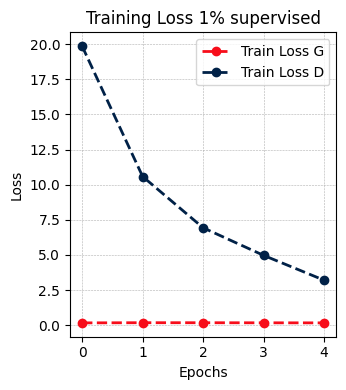

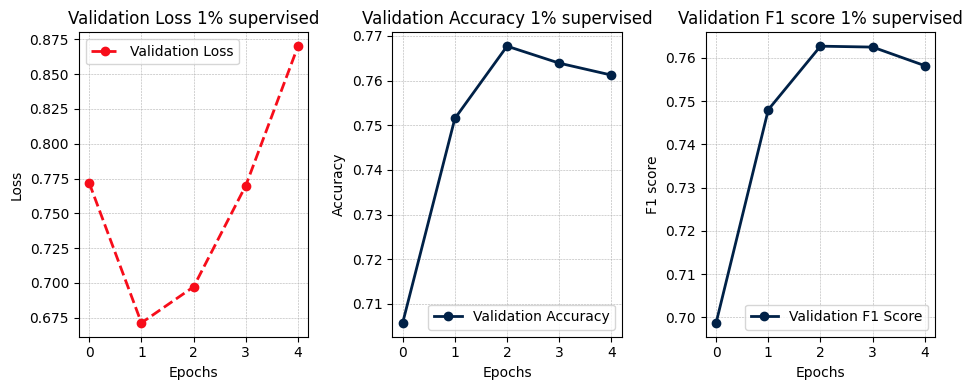

100%|██████████| 288/288 [14:54<00:00,  3.11s/it]


Epoch 1/5: Train Loss G: 0.1994, Train Loss D: 6.5639, Validation Loss: 0.7098, Validation Accuracy: 0.7311, Validation_f1: 0.7277


100%|██████████| 288/288 [14:55<00:00,  3.11s/it]


Epoch 2/5: Train Loss G: 0.1760, Train Loss D: 3.2468, Validation Loss: 0.8892, Validation Accuracy: 0.6972, Validation_f1: 0.6908


100%|██████████| 288/288 [14:59<00:00,  3.12s/it]


Epoch 3/5: Train Loss G: 0.1570, Train Loss D: 2.0705, Validation Loss: 0.8940, Validation Accuracy: 0.7284, Validation_f1: 0.7225


100%|██████████| 288/288 [14:55<00:00,  3.11s/it]


Epoch 4/5: Train Loss G: 0.1430, Train Loss D: 1.3274, Validation Loss: 0.9064, Validation Accuracy: 0.7405, Validation_f1: 0.7399


100%|██████████| 288/288 [14:59<00:00,  3.12s/it]


Epoch 5/5: Train Loss G: 0.1295, Train Loss D: 0.8351, Validation Loss: 1.0712, Validation Accuracy: 0.7284, Validation_f1: 0.7208
Best model saved at epoch 3
Test Accuracy equals: 0.49033333333333334
Test f1 score equals: 0.49733822361960894


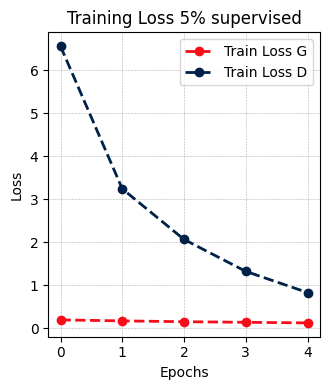

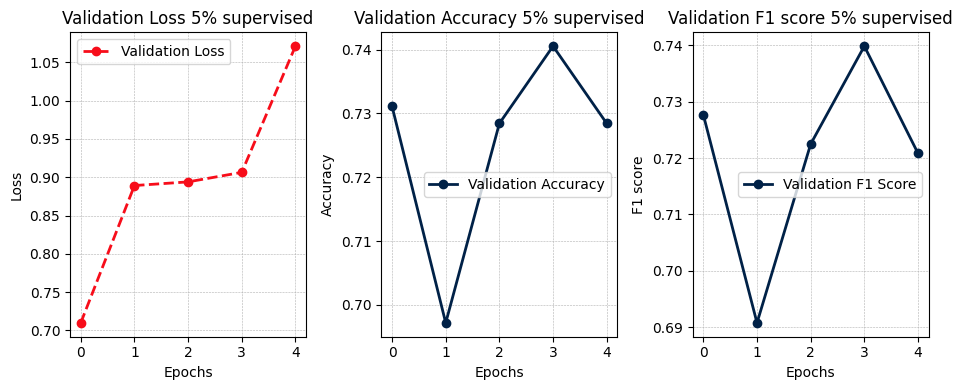

100%|██████████| 301/301 [15:36<00:00,  3.11s/it]


Epoch 1/5: Train Loss G: 0.1989, Train Loss D: 4.3167, Validation Loss: 0.7668, Validation Accuracy: 0.7145, Validation_f1: 0.7094


100%|██████████| 301/301 [15:35<00:00,  3.11s/it]


Epoch 2/5: Train Loss G: 0.1625, Train Loss D: 2.0916, Validation Loss: 0.8526, Validation Accuracy: 0.7176, Validation_f1: 0.7077


100%|██████████| 301/301 [15:35<00:00,  3.11s/it]


Epoch 3/5: Train Loss G: 0.1407, Train Loss D: 1.3244, Validation Loss: 0.8051, Validation Accuracy: 0.7486, Validation_f1: 0.7448


100%|██████████| 301/301 [15:36<00:00,  3.11s/it]


Epoch 4/5: Train Loss G: 0.1265, Train Loss D: 0.8141, Validation Loss: 0.7819, Validation Accuracy: 0.7702, Validation_f1: 0.7679


100%|██████████| 301/301 [15:36<00:00,  3.11s/it]


Epoch 5/5: Train Loss G: 0.1138, Train Loss D: 0.5329, Validation Loss: 0.9396, Validation Accuracy: 0.7576, Validation_f1: 0.7523
Best model saved at epoch 3
Test Accuracy equals: 0.5086666666666667
Test f1 score equals: 0.4672114745338364


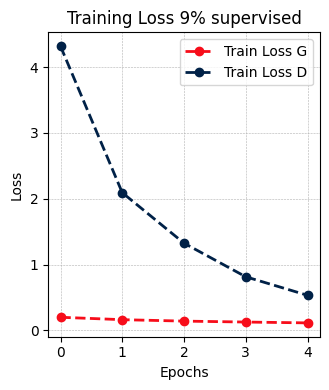

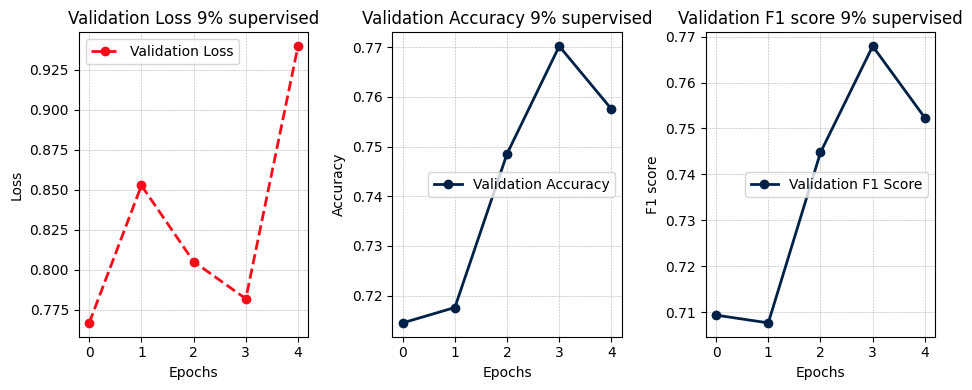

100%|██████████| 250/250 [12:58<00:00,  3.11s/it]


Epoch 1/5: Train Loss G: 0.1984, Train Loss D: 2.4281, Validation Loss: 0.7897, Validation Accuracy: 0.7055, Validation_f1: 0.7000


100%|██████████| 250/250 [12:59<00:00,  3.12s/it]


Epoch 2/5: Train Loss G: 0.1636, Train Loss D: 1.2656, Validation Loss: 0.8500, Validation Accuracy: 0.7036, Validation_f1: 0.6941


100%|██████████| 250/250 [12:59<00:00,  3.12s/it]


Epoch 3/5: Train Loss G: 0.1388, Train Loss D: 0.8704, Validation Loss: 0.8191, Validation Accuracy: 0.7229, Validation_f1: 0.7176


100%|██████████| 250/250 [12:57<00:00,  3.11s/it]


Epoch 4/5: Train Loss G: 0.1209, Train Loss D: 0.5731, Validation Loss: 0.8694, Validation Accuracy: 0.7305, Validation_f1: 0.7243


100%|██████████| 250/250 [12:59<00:00,  3.12s/it]


Epoch 5/5: Train Loss G: 0.1078, Train Loss D: 0.3781, Validation Loss: 0.9345, Validation Accuracy: 0.7415, Validation_f1: 0.7369
Best model saved at epoch 4
Test Accuracy equals: 0.494
Test f1 score equals: 0.49313005847235625


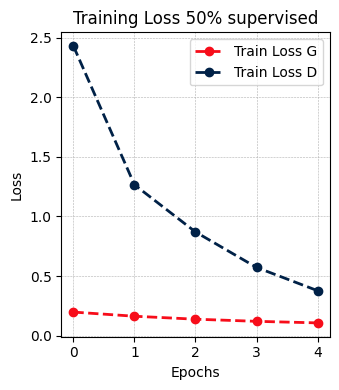

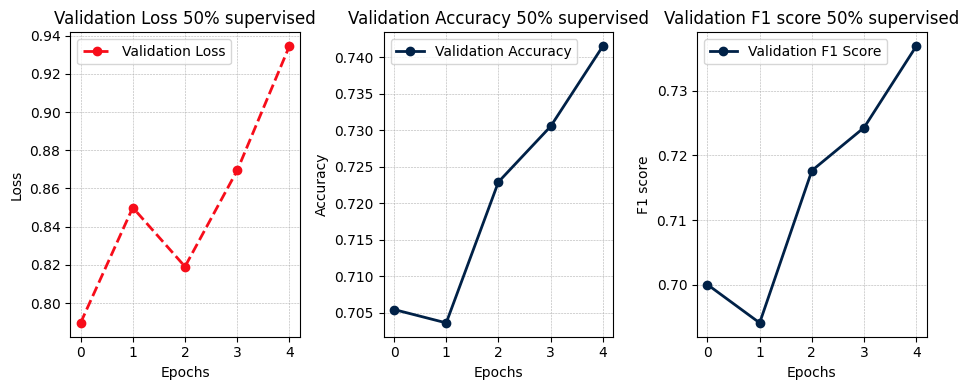

In [ ]:
g1_bert_acc_list = []
g1_bert_f1_list = []
for unsupervised_ratio in [0.99, 0.95, 0.90, 0.50]:
    bert_save_path = (
        f"./Plots/generator1/bert_{int(100*(1-unsupervised_ratio))}sup.pth"
    )
    discriminator_save_path = (
        f"./Plots/generator1/discriminator_{int(100*(1-unsupervised_ratio))}sup.pth"
    )
    generator_save_path = (
        f"./Plots/generator1/generator_{int(100*(1-unsupervised_ratio))}sup.pth"
    )
    plot_save_path = f"./Plots/generator1/"

    bert_model, _ = get_bert_model(model_name=model_name)
    classifier = Discriminator()
    generator = Generator1()

    # Get dataloaders
    train_dataloader, val_dataloader, test_dataloader = generate_dataloader(
        dataset_folder_path=dataset_path,
        unsupervised_ratio=unsupervised_ratio,
        tokenizer=bert_tokenizer,
        train_batch_size=train_batch_size,
        valid_batch_size=val_test_batch_size,
        test_batch_size=val_test_batch_size,
        max_length=max_size,
        use_unsup=True,
        use_bow_dataset=False,
        random_seed=42,
    )

    # Define optimizers
    discriminator_params = [v for v in bert_model.parameters()] + [
        v for v in classifier.parameters()
    ]
    generator_params = [v for v in generator.parameters()]
    d_optimizer = torch.optim.AdamW(
        discriminator_params, lr=learning_rate_discriminator
    )
    g_optimizer = torch.optim.AdamW(generator_params, lr=learning_rate_generator)

    bert_model, generator, classifier, gan1_training_results = train_gan(
        transformer=bert_model,
        generator=generator,
        discriminator=classifier,
        bow_mode=False,
        generator_optimizer=g_optimizer,
        discriminator_optimizer=d_optimizer,
        epochs=epochs,
        generator_scheduler=None,
        discriminator_scheduler=None,
        train_dataloader=train_dataloader,
        validation_dataloader=val_dataloader,
        transformer_path=bert_save_path,
        discriminator_path=discriminator_save_path,
        generator_path=generator_save_path,
        multi_gpu=multi_gpu
    )

    # Test the model
    test_acc, test_f1 = test_gan_bert(
        bert_model_name=model_name,
        transformer_path=bert_save_path,
        generator_path=generator_save_path,
        discriminator_path=discriminator_save_path,
        bow_mode=False,
        test_dataloader=test_dataloader
    )
    g1_bert_acc_list.append(test_acc)
    g1_bert_f1_list.append(test_f1)

    title_suffix = " " + str(int(100*(1-unsupervised_ratio))) + f"% supervised"
    # Visualize results
    plot_results_gan(gan1_training_results, title_suffix, plot_save_path)

np.save(file="./Plots/generator1/acc.npy", arr=np.array(g1_bert_acc_list))
np.save(file="./Plots/generator1/f1.npy", arr=np.array(g1_bert_f1_list))

## G2

In [ ]:
torch.manual_seed(42)
train_batch_size = 128
val_test_batch_size = 128
epochs = 5
learning_rate_discriminator = 5e-5
learning_rate_generator = 5e-5
max_size = 64
model_name = "bert-base-cased"
bert_tokenizer, bert_config = get_tokenizer(model_name=model_name)

In [ ]:
if not os.path.exists("./Plots/generator2/"):
    os.mkdir(path="./Plots/generator2/")

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

100%|██████████| 526/526 [27:35<00:00,  3.15s/it]


Epoch 1/3: Train Loss G: 0.2039, Train Loss D: 18.3954, Validation Loss: 0.6998, Validation Accuracy: 0.7384, Validation_f1: 0.7384


100%|██████████| 526/526 [28:03<00:00,  3.20s/it]


Epoch 2/3: Train Loss G: 0.1786, Train Loss D: 10.1228, Validation Loss: 0.7766, Validation Accuracy: 0.7277, Validation_f1: 0.7277


100%|██████████| 526/526 [28:05<00:00,  3.20s/it]


Epoch 3/3: Train Loss G: 0.1468, Train Loss D: 7.0485, Validation Loss: 0.8308, Validation Accuracy: 0.7263, Validation_f1: 0.7263
Best model saved at epoch 0
Test Accuracy equals: 0.501
Test f1 score equals: 0.501


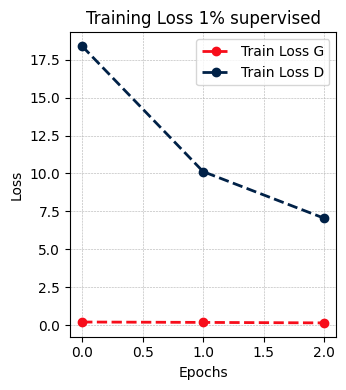

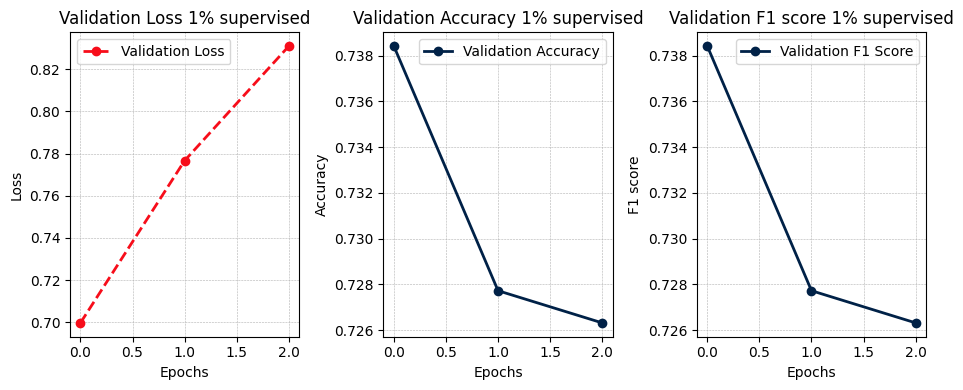

100%|██████████| 576/576 [31:00<00:00,  3.23s/it]


Epoch 1/3: Train Loss G: 0.1874, Train Loss D: 5.1622, Validation Loss: 0.6897, Validation Accuracy: 0.7484, Validation_f1: 0.7484


100%|██████████| 576/576 [31:01<00:00,  3.23s/it]


Epoch 2/3: Train Loss G: 0.1295, Train Loss D: 2.6467, Validation Loss: 0.7735, Validation Accuracy: 0.7364, Validation_f1: 0.7364


100%|██████████| 576/576 [30:58<00:00,  3.23s/it]


Epoch 3/3: Train Loss G: 0.1027, Train Loss D: 1.6310, Validation Loss: 0.7251, Validation Accuracy: 0.7650, Validation_f1: 0.7650
Best model saved at epoch 2
Test Accuracy equals: 0.5176666666666667
Test f1 score equals: 0.5176666666666667


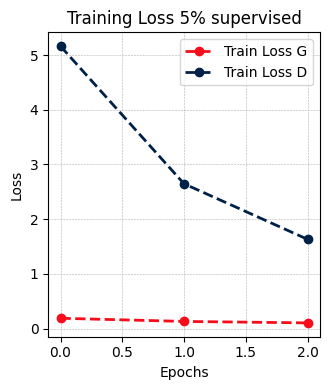

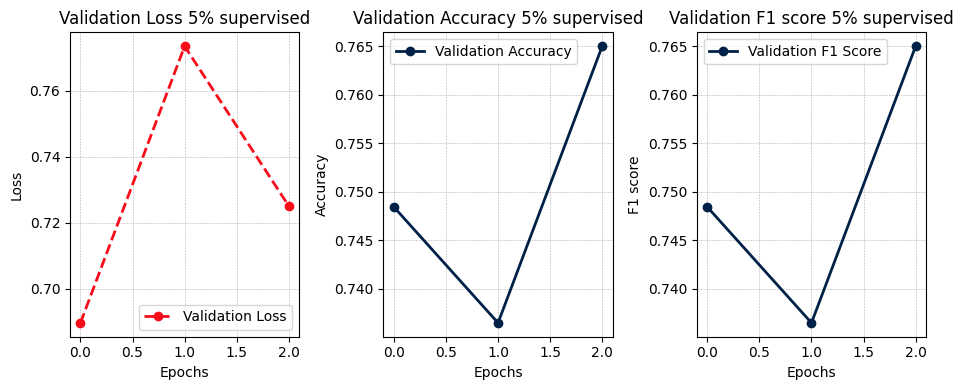

100%|██████████| 601/601 [32:02<00:00,  3.20s/it]


Epoch 2/3: Train Loss G: 0.1212, Train Loss D: 1.7692, Validation Loss: 0.8254, Validation Accuracy: 0.7305, Validation_f1: 0.7305


100%|██████████| 601/601 [32:15<00:00,  3.22s/it]


Epoch 3/3: Train Loss G: 0.0933, Train Loss D: 1.0304, Validation Loss: 0.7934, Validation Accuracy: 0.7573, Validation_f1: 0.7573
Best model saved at epoch 2
Test Accuracy equals: 0.501
Test f1 score equals: 0.501


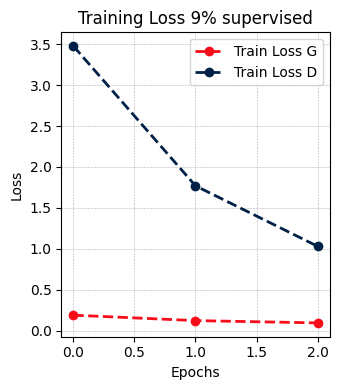

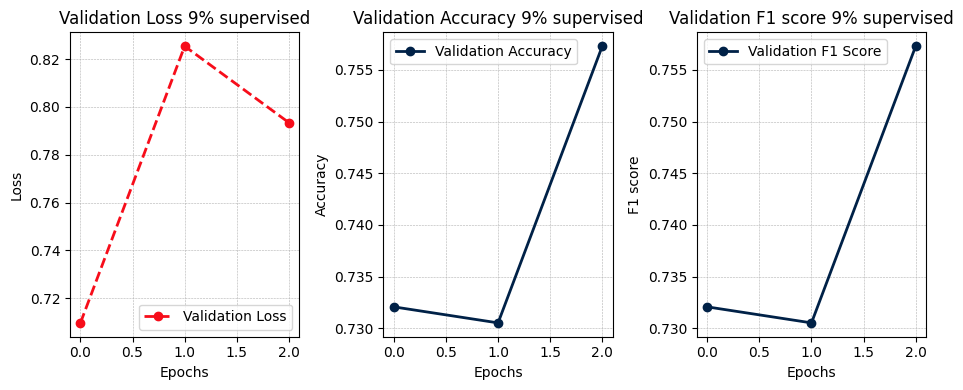

100%|██████████| 500/500 [26:53<00:00,  3.23s/it]


Epoch 1/3: Train Loss G: 0.1713, Train Loss D: 1.8869, Validation Loss: 0.7019, Validation Accuracy: 0.7307, Validation_f1: 0.7307


100%|██████████| 500/500 [26:41<00:00,  3.20s/it]


Epoch 2/3: Train Loss G: 0.1091, Train Loss D: 1.0300, Validation Loss: 0.7821, Validation Accuracy: 0.7250, Validation_f1: 0.7250


100%|██████████| 500/500 [26:44<00:00,  3.21s/it]


Epoch 3/3: Train Loss G: 0.0857, Train Loss D: 0.6486, Validation Loss: 0.8600, Validation Accuracy: 0.7308, Validation_f1: 0.7308
Best model saved at epoch 2
Test Accuracy equals: 0.525
Test f1 score equals: 0.525


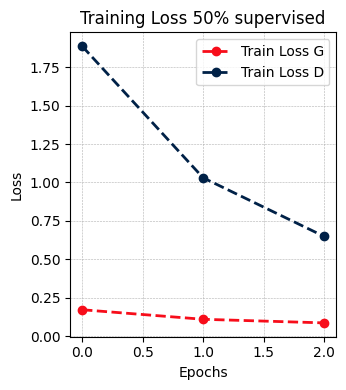

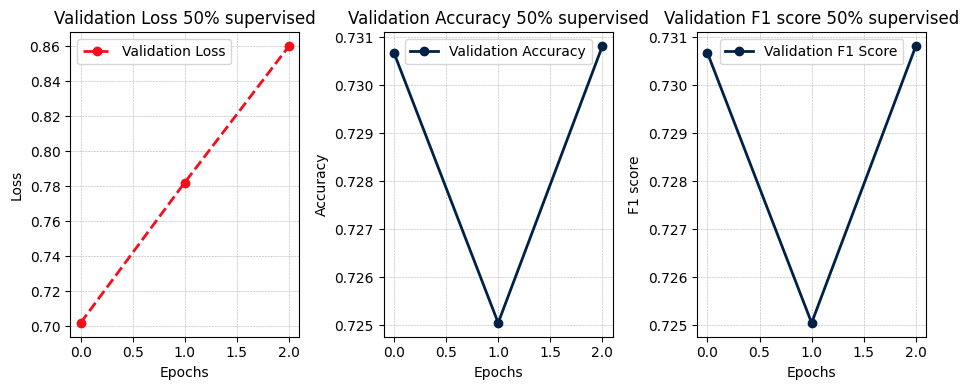

In [7]:
g2_bert_acc_list = []
g2_bert_f1_list = []
for unsupervised_ratio in [0.99, 0.95, 0.90, 0.50]:
    bert_save_path = (
        f"./Plots/generator2/bert_{int(100*(1-unsupervised_ratio))}sup.pth"
    )
    discriminator_save_path = (
        f"./Plots/generator2/discriminator_{int(100*(1-unsupervised_ratio))}sup.pth"
    )
    generator_save_path = (
        f"./Plots/generator2/generator_{int(100*(1-unsupervised_ratio))}sup.pth"
    )
    plot_save_path = f"./Plots/generator2/"

    bert_model, _ = get_bert_model(model_name=model_name)
    classifier = Discriminator()
    generator, _ = get_bert_model(model_name=model_name)

    # Get dataloaders
    train_dataloader, val_dataloader, test_dataloader = generate_dataloader(
        dataset_folder_path=dataset_path,
        unsupervised_ratio=unsupervised_ratio,
        tokenizer=bert_tokenizer,
        train_batch_size=train_batch_size,
        valid_batch_size=val_test_batch_size,
        test_batch_size=val_test_batch_size,
        max_length=max_size,
        use_unsup=True,
        use_bow_dataset=True,
        random_seed=42,
    )

    # Define optimizers
    discriminator_params = [v for v in bert_model.parameters()] + [
        v for v in classifier.parameters()
    ]
    generator_params = [v for v in generator.parameters()]
    d_optimizer = torch.optim.AdamW(
        discriminator_params, lr=learning_rate_discriminator
    )
    g_optimizer = torch.optim.AdamW(generator_params, lr=learning_rate_generator)

    bert_model, generator, classifier, gan2_training_results = train_gan(
        transformer=bert_model,
        generator=generator,
        discriminator=classifier,
        bow_mode=True,
        generator_optimizer=g_optimizer,
        discriminator_optimizer=d_optimizer,
        epochs=epochs,
        generator_scheduler=None,
        discriminator_scheduler=None,
        train_dataloader=train_dataloader,
        validation_dataloader=val_dataloader,
        transformer_path=bert_save_path,
        discriminator_path=discriminator_save_path,
        generator_path=generator_save_path,
        multi_gpu=multi_gpu
    )

    # Test the model
    test_acc, test_f1 = test_gan_bert(
        bert_model_name=model_name,
        transformer_path=bert_save_path,
        generator_path=generator_save_path,
        discriminator_path=discriminator_save_path,
        bow_mode=True,
        test_dataloader=test_dataloader
    )
    g2_bert_acc_list.append(test_acc)
    g2_bert_f1_list.append(test_f1)

    title_suffix = " " + str(int(100*(1-unsupervised_ratio))) + f"% supervised"
    # Visualize results
    plot_results_gan(gan2_training_results, title_suffix, plot_save_path)

np.save(file="./Plots/generator2/acc.npy", arr=np.array(g2_bert_acc_list))
np.save(file="./Plots/generator2/f1.npy", arr=np.array(g2_bert_f1_list))

In [10]:
!ls /kaggle/working/Plots/generator2/

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


acc.npy			discriminator_50sup.pth  generator_5sup.pth
bert_1sup.pth		discriminator_5sup.pth	 generator_9sup.pth
bert_50sup.pth		discriminator_9sup.pth	 plot__1%_supervised.png
bert_5sup.pth		f1.npy			 plot__5%_supervised.png
bert_9sup.pth		generator_1sup.pth	 plot__50%_supervised.png
discriminator_1sup.pth	generator_50sup.pth	 plot__9%_supervised.png


In [ ]:
!cp /kaggle/working/Plots/generator2/